<a href="https://colab.research.google.com/github/Karolsak/analiza-obwodu/blob/master/analiza_lacpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pdflatex
!sudo apt-get install texlive-latex-recommended
!sudo apt install texlive-latex-extra
!sudo apt install dvipng
!pip install lcapy

  Attempting uninstall: attrs
    Found existing installation: attrs 24.2.0
    Uninstalling attrs-24.2.0:
      Successfully uninstalled attrs-24.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jsonschema 4.23.0 requires attrs>=22.2.0, but you have attrs 18.2.0 which is incompatible.
referencing 0.35.1 requires attrs>=22.2.0, but you have attrs 18.2.0 which is incompatible.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lmodern fonts-noto-mono fonts-urw-base35
  libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0
  libkpathsea6 libptexenc1 libsynctex2 libteckit0 libtexlua53 libtexluajit2
  libwoff1 libzzip-0-13 lmodern poppler-data t1utils tex-common texlive-base
  texlive-binaries texlive-latex-base xfo

<Axes: xlabel='Frequency (Hz)', ylabel='ASD (nV/rootHz)'>

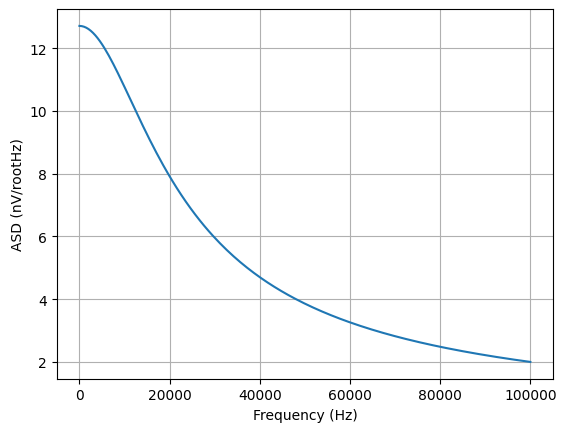

In [6]:
from lcapy import Circuit, f

a = Circuit("""
R 1 0; down
W 1 2; right
C 2 0_2; down
W 0 0_2; right""")

b = a.noisy()

Vn = b.C.V.n(f).subs({'R':10e3, 'C':1e-9, 'T':293, 'k_B':1.38e-23})

from numpy import linspace
vf = linspace(0, 100e3, 200)

from matplotlib.pyplot import savefig
(Vn * 1e9).plot(vf, plot_type='mag', ylabel='ASD (nV/rootHz)')

# savefig(__file__.replace('.py', '.png'), bbox_inches='tight')

In [13]:
from lcapy import Circuit, j, omega, s
cct = Circuit("""
Vi 1 0_1 step; down
C 1 2; right=3.5
R 2 0; down
W 0_1 0; right
W 0 0_2; right=0.5
P1 2_2 0_2; down
W 2 2_2;right=0.5""")

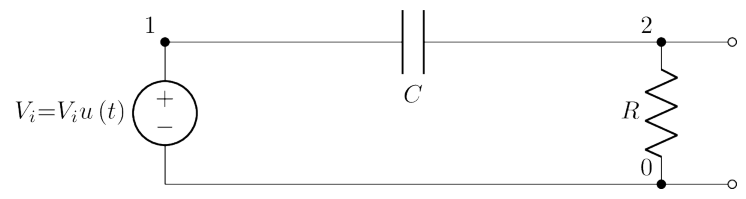

In [14]:
cct.draw()

In [15]:
H = (cct.R.V(s) / cct.Vi.V(s)).simplify(); H

  C⋅R⋅s  
─────────
C⋅R⋅s + 1

In [16]:
H(j * omega)

  ⅉ⋅C⋅R⋅ω  
───────────
ⅉ⋅C⋅R⋅ω + 1

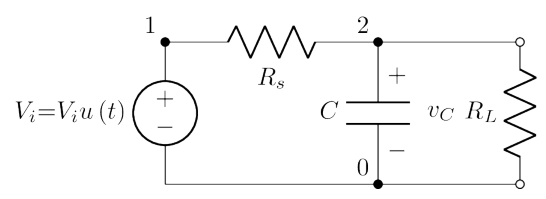

In [17]:
from lcapy import Circuit, j, omega, s
cct = Circuit("""
Vi 1 0_1 step; down
Rs 1 2; right=1.5
C 2 0; down, v=v_C
W1 0_1 0; right
W2 0 0_2; right
P1 2_2 0_2; down
RL 2_2 0_2; down
W3 2 2_2;right""")
cct.draw()

In [21]:
H = cct.RL.V(s) / cct.Vi.V(s)
H

           s            
────────────────────────
     ⎛ 2   s⋅(R_L + Rₛ)⎞
C⋅Rₛ⋅⎜s  + ────────────⎟
     ⎝       C⋅R_L⋅Rₛ  ⎠

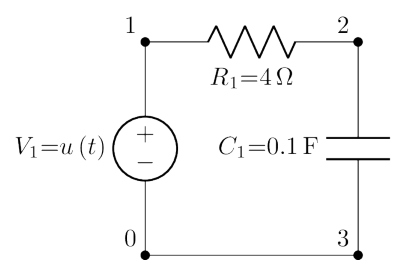

In [24]:
from lcapy import Circuit, s
cct = Circuit("""
V1 1 0 {u(t)}; down
R1 1 2 4; right=1.5
C1 2 3 0.1; down=1.5
W1 0 3; right
""")
cct.draw()

In [25]:
cct[2].V(s)

     5      
────────────
  ⎛ 2   5⋅s⎞
2⋅⎜s  + ───⎟
  ⎝      2 ⎠

In [26]:
cct[2].v

  ⎛       -5⋅t ⎞     
  ⎜       ─────⎟     
  ⎜         2  ⎟     
  ⎜2   2⋅ℯ     ⎟     
5⋅⎜─ - ────────⎟⋅u(t)
  ⎝5      5    ⎠     
─────────────────────
          2          

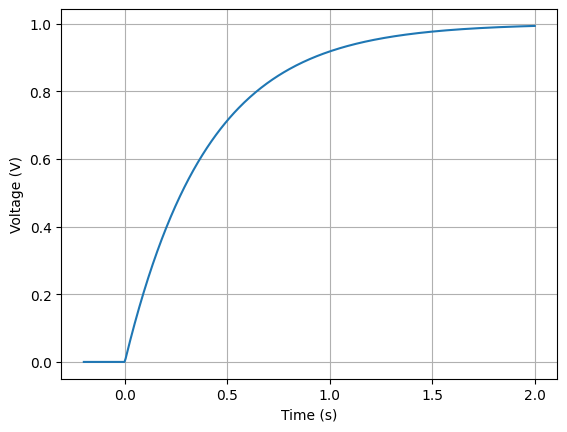

In [27]:
%matplotlib inline
ax = cct[2].v.plot()

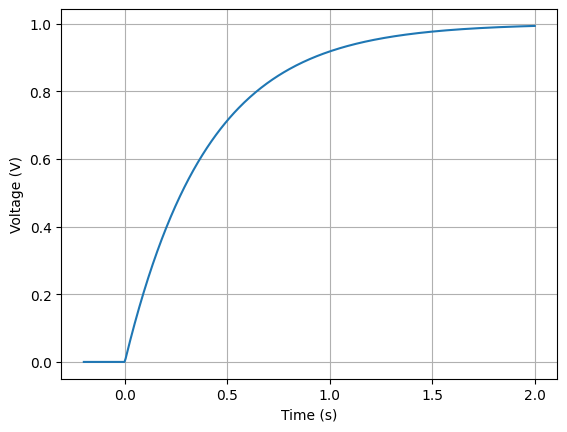

In [28]:
ax = cct[2].v.plot()

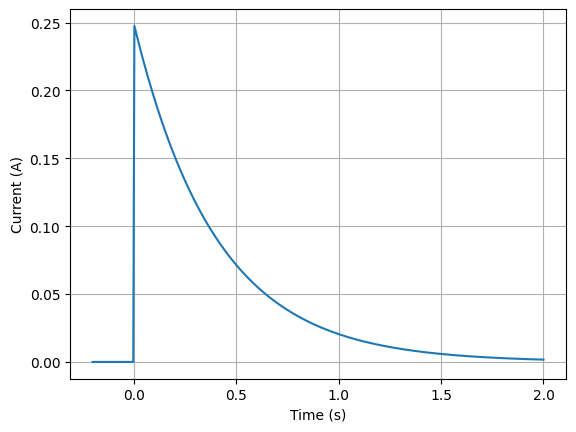

In [31]:
ax = cct.R1.i.plot()

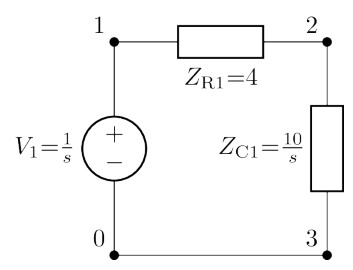

In [33]:
cct.s_model().draw()

In [34]:
cct[2].V(s).ZPK()

      5      
─────────────
2⋅s⋅(s + 5/2)

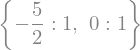

In [35]:
cct[2].V(s).poles()

In [36]:
cct[2].V(s).poles(aslist=True)

[-5/2, 0]

In [37]:
cct[2].V(s).zeros()

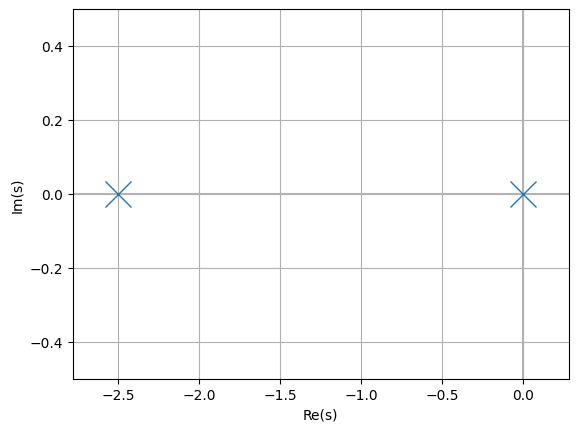

In [38]:
ax =cct[2].V(s).plot()

In [32]:
# prompt: randomly select 5 items from a list

import random

# Assuming your list is stored in a variable called 'my_list'
my_list = [
    "R 1 0; down ",
    "W 1 2; right ",
    "C 2 0_2; down ",
    "W 0 0_2; right",
    "Vi 1 0_1 step; down",
    "C 1 2; right=3.5",
    "R 2 0; down",
    "W 0_1 0; right",
    "W 0 0_2; right=0.5",
    "P1 2_2 0_2; down",
    "W 2 2_2;right=0.5",
    "Vi 1 0_1 step; down",
    "Rs 1 2; right=1.5",
    "C 2 0; down, v=v_C",
    "W1 0_1 0; right",
    "W2 0 0_2; right",
    "P1 2_2 0_2; down",
    "RL 2_2 0_2; down",
    "W3 2 2_2;right",
    "V1 1 0 {u(t)}; down",
    "R1 1 2 4; right=1.5",
    "C1 2 3 0.1; down=1.5",
    "W1 0 3; right"
]


selected_items = random.sample(my_list, 5)
selected_items

['RL 2_2 0_2; down',
 'V1 1 0 {u(t)}; down',
 'W2 0 0_2; right',
 'W 0_1 0; right',
 'Vi 1 0_1 step; down']